In [43]:
# import pyplot
import os
import pandas as pd
import nltk

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# os.chdir('Users/sahilarora/Desktop/Code Classes/Tools for Analytics/Project/yelp_dataset')
# import zipfile
# with zipfile.ZipFile("Users/sahilarora/Desktop/Code Classes/Tools for Analytics/Project/yelp_datasetyelp_academic_dataset_review.json.zip", 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [49]:
os.chdir('/Users/sahilarora/Desktop/Code Classes/Tools for Analytics/Project/yelp_dataset')

with open('yelp_academic_dataset_review.json', 'r') as f:
    data = f.readlines()
    
dff2 = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(dff2) + "]"

reviews = pd.read_json(data_json_str)

In [51]:
reviews.shape

(5996996, 9)

In [47]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [50]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    import re
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

# def clean_dataframe(data):
#     "drop nans, then apply 'clean_sentence' function to question1 and 2"
#     data = data.dropna(how="any")
    
#     for col in ['question1', 'question2']:
#         data[col] = data[col].apply(clean_sentence)
    
#     return data

# data = clean_dataframe(data)

In [52]:
reviews = reviews.dropna(how="any")

In [53]:
reviews["clean_reviews"] = reviews["text"].apply(clean_sentence)

In [54]:
reviews.to_csv("clean_reviews.csv",encoding = 'utf-8',index = False)

In [55]:
reviews_good=reviews[reviews["stars"]>3.5]
reviews_poor=reviews[reviews["stars"]<3]

In [62]:
reviews_poor["clean_reviews"]

0          pizza okay best ive prefer biaggios flamingo  ...
2          terrible dry corn bread rib tips fat mushy fla...
3          back 20052007 place favorite thai place ever i...
5          place sucks customer service horrible dont ser...
9          food pretty good gonna lie make sacrifices cho...
11         score negative horrible like 67 items buffet n...
21         food alright service horrible orders came inco...
23         could leave zero stars would rude b fake lashe...
25         write review fractured prune first love doughn...
26         wish could tell food problem friend went dinne...
32         limited vegetarian options ordered greek salad...
38         nonexistened service  waiter even great us lis...
40         place doesnt even deserve 1 star horrible serv...
44         easy access store ample parking offered servic...
45         3x beef 45 stop coming whats point always take...
46         case email didnt work still giving 1  tried ca...
52         overall ratin

In [63]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['clean_reviews']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus_good = build_corpus(reviews_good)        
# corpus_good[0:2]

corpus_poor = build_corpus(reviews_poor)        
corpus_poor[0:2]

[['pizza',
  'okay',
  'best',
  'ive',
  'prefer',
  'biaggios',
  'flamingo',
  '',
  'fort',
  'apache',
  'chef',
  'make',
  'much',
  'better',
  'ny',
  'style',
  'pizza',
  'pizzeria',
  '',
  'cosmo',
  'priced',
  'quality',
  'lack',
  'personality',
  'food',
  'biaggios',
  'much',
  'better',
  'pick',
  'youre',
  'going',
  'italian',
  '',
  'family',
  'owned',
  'home',
  'made',
  'recipes',
  'people',
  'actually',
  'like',
  'food',
  'dont',
  'get',
  'pizzeria',
  'casino',
  'dont',
  'say'],
 ['terrible',
  'dry',
  'corn',
  'bread',
  'rib',
  'tips',
  'fat',
  'mushy',
  'flavor',
  'bbq',
  'neighborhood',
  'go',
  'john',
  'mulls',
  'roadkill',
  'grill',
  'trust']]

In [72]:
model_good = word2vec.Word2Vec(corpus_good, size=100, window=20, min_count=2000, workers=4)
# model_good.wv['good']  

model_poor = word2vec.Word2Vec(corpus_poor, size=100, window=20, min_count=2000, workers=4)
# model_poor.wv['pizza']                                                                                                              

In [69]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


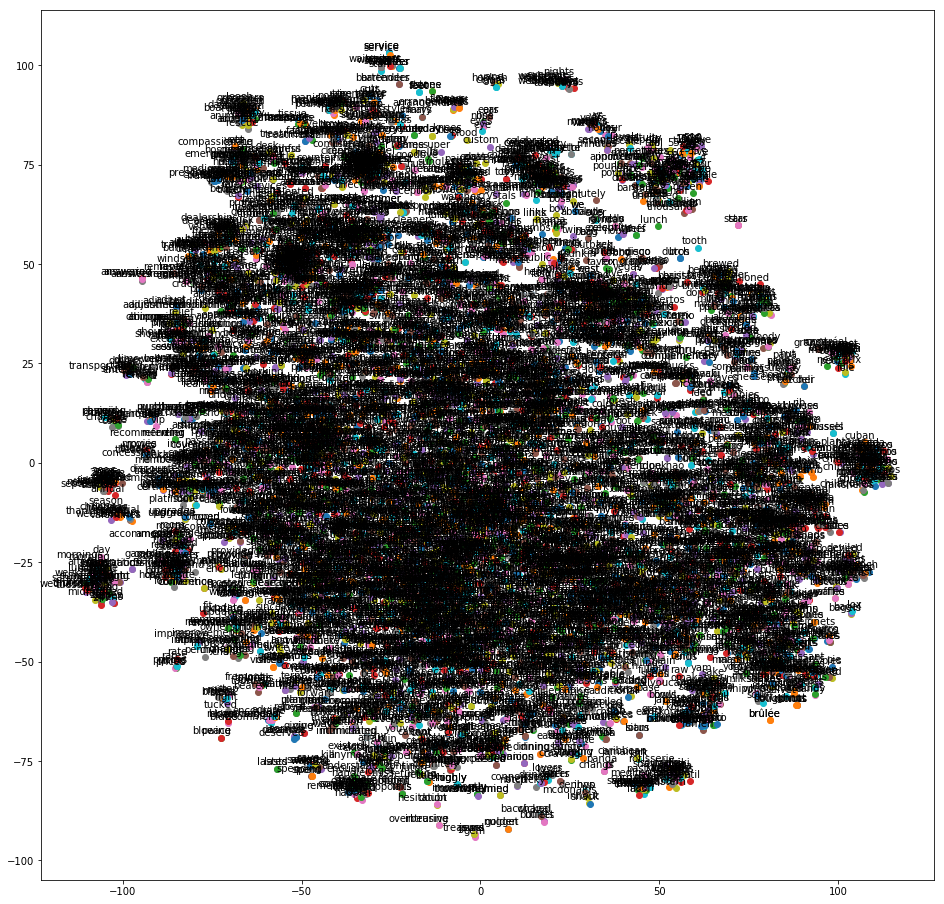

In [73]:
tsne_plot(model_good)

In [ ]:
tsne_plot(model_poor)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


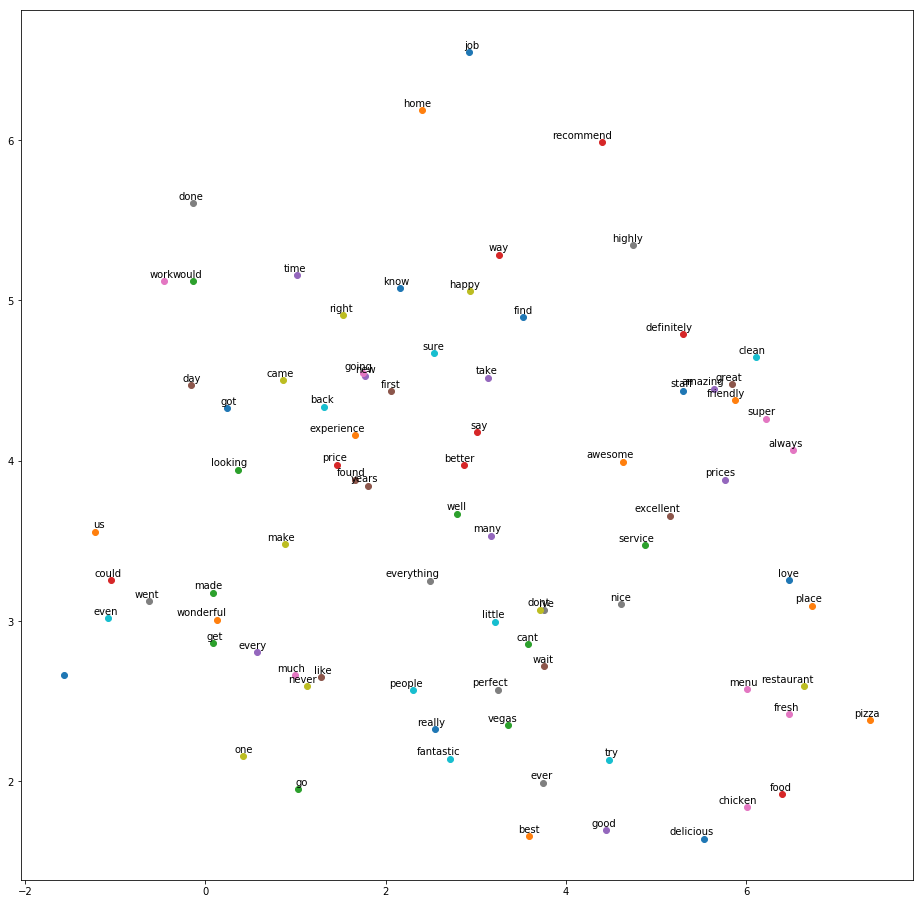

In [76]:
# model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=300, workers=4)
# tsne_plot(model)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


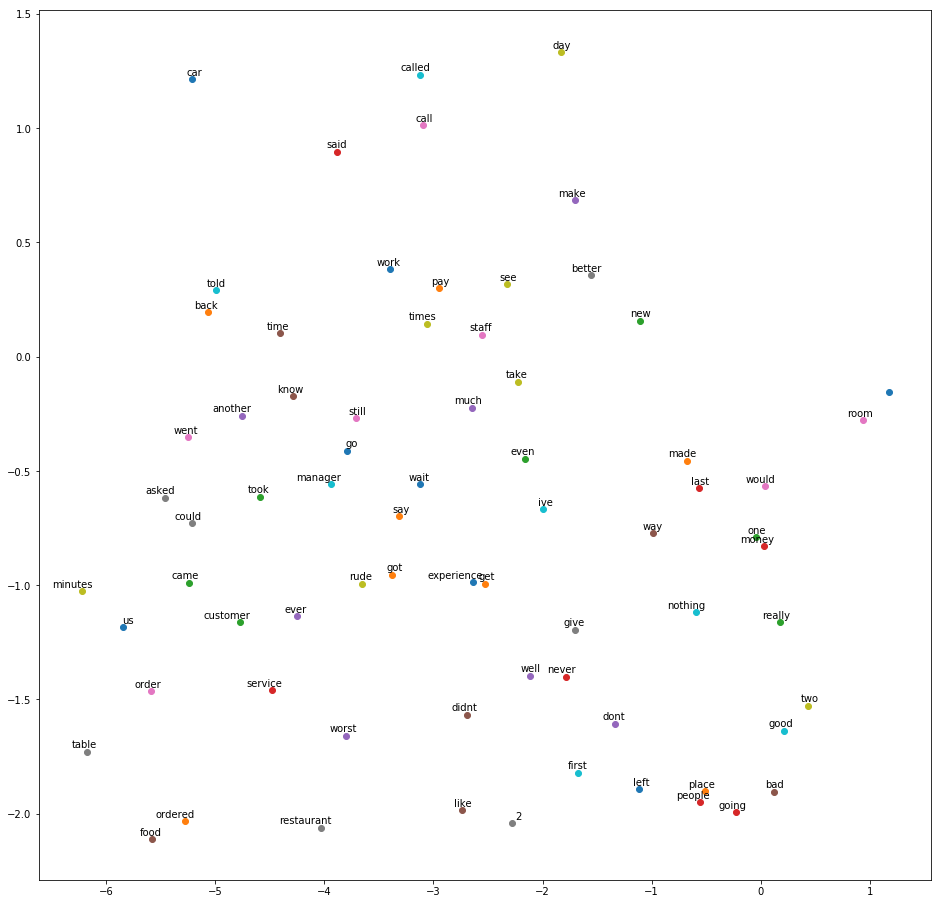

In [82]:
# model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
# tsne_plot(model)

In [22]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 1.87005557e-03 -7.45558005e-04  1.04549131e-03 -3.82605009e-03
  1.17204222e-03  1.20723702e-03 -4.97500296e-04 -3.88474576e-03
 -2.38581887e-03  2.28992221e-03  3.55170853e-03 -4.50636307e-03
 -3.96352727e-03 -2.40180106e-03 -9.85427643e-04 -8.74145771e-04
  2.31170771e-03  2.46766140e-03 -3.13297706e-03 -4.91487421e-03
 -9.73947521e-04 -3.97745986e-03  3.54773668e-03  1.36645080e-03
 -3.50924139e-03  2.56739045e-03 -2.45360308e-04 -4.75957245e-03
  7.46995851e-04  3.18856188e-03  3.31376120e-03  1.42447720e-03
 -3.96090327e-04 -3.56121175e-03  9.13018070e-04  4.49799187e-03
  2.01716041e-03 -2.89995968e-03  4.45223972e-03  9.83565464e-04
  3.51284770e-03  2.31192866e-03 -1.13348455e-04 -2.88561010e-03
 -4.06652363e-03  4.72665438e-03 -3.57941212e-03  4.70462954e-03
 -1.70433591e-03  1.09719345e-03  3.64486990e-03 -4.01050

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [23]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = 
# [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

SyntaxError: invalid syntax (<ipython-input-23-0fd01fc80a4a>, line 5)

In [24]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'